# Challenge 2

In this lab you will partner with another student to conduct **[pair programming](https://en.wikipedia.org/wiki/Pair_programming)**. In the next 60 minutes there will be 2 coding sessions of 30 minutes each. In each sessoin, one student will be the **driver** to write the code to solve the problem while the other student will be the **observer** to watch and review. There will be several iterations of your code because the observer will help the driver review the codes and make improvements until the 15 minute session ends. After the coding session ends, the driver and observer will switch roles.

#### Import all the libraries that are necessary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

'\nimport numpy as np\nimport seaborn as sns\n%matplotlib inline\n'

## Preparation

#### Import the `Fitbit2.csv` file and name your dataset `fitbit`

In [2]:
fitbit = pd.read_csv("../data/Fitbit2.csv")
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


## Coding Session I - 30 minutes

From the Fitbit data, we want to visually understand: 

1. **How the average number of steps change by month. Use the appropriate visualization to show the median steps by month?**
1. **Is Fitbitter more active on weekend or workdays?**

##### All plots must be in the same jupyter notebook cell.

Hints:

- Use `Months_encoded` and `Week_or Weekend` columns
- Use `matplolib.pyplot` object oriented API
- Set your size figure to `12,4`
- Explore `plt.sca`
- Explore `plt.xticks`
- Save your figures

In [3]:
#Clean and format dataset
fitbit = fitbit[["Months", "Steps"]]
fitbit = fitbit.groupby("Months").mean()

#Turn month names into month number (for a better and ordered viz)
#Using the calendar module was the other option
months_order = {"January":1, 
               "February":2, 
               "March":3, 
               "April":4, 
               "May":5, 
               "June":6, 
               "July":7, 
               "August":8, 
               "September":9, 
               "October":10, 
               "November":11, 
               "December":12}

fitbit["Month"] = fitbit.index.map(months_order)

#Set Months_num as index
fitbit = fitbit.set_index(["Month"]).sort_index(0)

fitbit.head()

,Steps
Month,
1,9892.064516
2,8922.866667
3,10312.935484
4,13079.033333
5,10620.096774


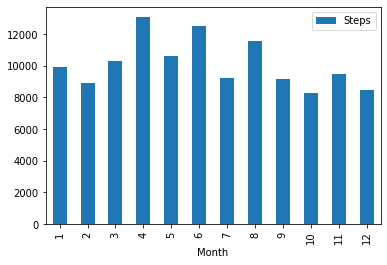

In [4]:
#Draw results
fitbit.plot(kind='bar');

In [5]:
max_steps = int(max(fitbit["Steps"]))
max_month_num = fitbit["Steps"].idxmax()
max_month = list(months_order.keys())[list(months_order.values()).index(max_month_num)].lower()

print("The month with most steps on average was", max_month, "with a mean of", max_steps, "steps")

The month with most steps on average was april with a mean of 13079 steps


## Coding Session II - 30 minutes

**Write a loop to plot 3 scatter plots of the following features:**

1. **`Minutes Lightly Active`  vs `Steps`**
1. **`Minutes Very Active` vs `Steps`**
1. **`Minutes Sedentary` vs `Steps`**

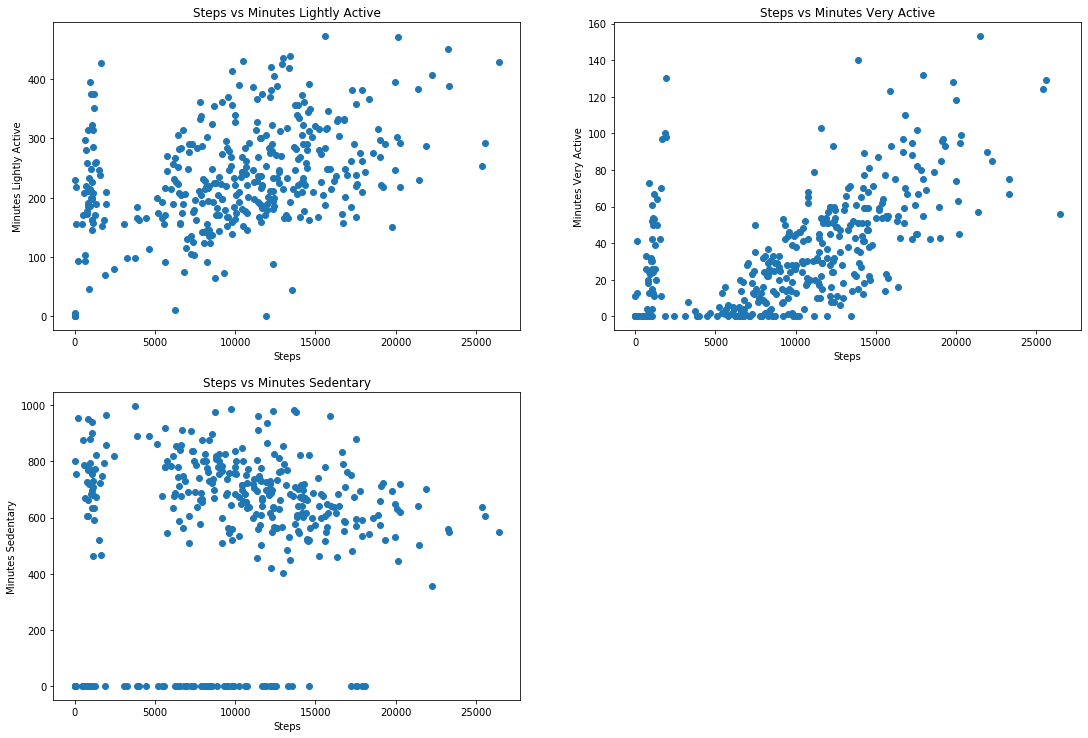

In [6]:
#Restore fitbit data
fitbit = pd.read_csv("../data/Fitbit2.csv")

#Create the list of features to compare 
to_compare = ["Minutes Lightly Active", "Minutes Very Active", "Minutes Sedentary"]

#Define a program able to complete the exercise
def scatters_with(main_variable, secondary_variables, dataframe):
    """
    Takes a dataframe, the name of one of its columns and a list of others and draws a scatter plot for each pair.
    """    
    graphics_number = len(to_compare)
    subplot_index = 1

    columns_number = 2
    rows_number = math.ceil(graphics_number/columns_number)
    
    #Configure size for subplots and distance between
    plt.subplots(figsize=(15,10))
    plt.tight_layout()
      
    for feature in to_compare: 

        #1. Declare axis for the current subplot
        plt.subplot(rows_number, columns_number, subplot_index)
        
        #2. Set a title for the graph
        subplot_title = main_variable + " vs " + feature
        plt.title(subplot_title)
        
        #3. Set axis labels
        plt.xlabel(main_variable)
        plt.ylabel(feature)
          
        #4. Print the graph
        plt.scatter(dataframe[main_variable], dataframe[feature])
        
        #5. Changes index for next scatter
        subplot_index += 1
        
scatters_with("Steps", to_compare, fitbit)